<a href="https://colab.research.google.com/github/devangelakou/training_projects/blob/main/heart_failurelogistic_regression_jovian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

training a model:

   1. We initialize a model with random parameters (weights & biases).
   2. We pass some inputs into the model to obtain predictions.
   3. We compare the model's predictions with the actual targets using the loss function.
   4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
   5. We repeat steps 1 to 4 till the predictions from the model are good enough.


In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
## import libraries 
# datasets
import opendatasets as od
import os

# data processing 
import pandas as pd
import numpy as np

# ML - regression 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
## graphs - visualisations 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set figure dims 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
# /kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv

dataset_url = 'https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: despoinaevan
Your Kaggle Key: ··········


100%|██████████| 3.97k/3.97k [00:00<00:00, 1.17MB/s]

In [7]:
data_dir = './heart-failure-clinical-data'
os.listdir(data_dir)

['heart_failure_clinical_records_dataset.csv']

In [8]:
train_csv = data_dir + '/heart_failure_clinical_records_dataset.csv'

In [9]:
raw_df = pd.read_csv(train_csv)
raw_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# About this data
I've downloaded the **Heart Failure in Clinical Records** dataset from Kaggle. Looking into heart failure data of old patients, we are hoping to be able to predict the probability of a new patient dieing. For this we'll need to analyse the data to understand it and then perform a logistic regression. 

At first glance, all of the available features seem important for a prognosis, however we are hoping to identify the ones that are stronger indicators. 

# Exploratory Data Analysis 

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


0-11 columns would be in the training dataset, and the death_event would be our predicting feature. 

It appears that the columns have no null values and are all numericals. Let's get a heatmap plot to see any obvious correlations between them.

In [12]:
# drop the predict column
raw_df.dropna(subset=['DEATH_EVENT'], inplace=True)

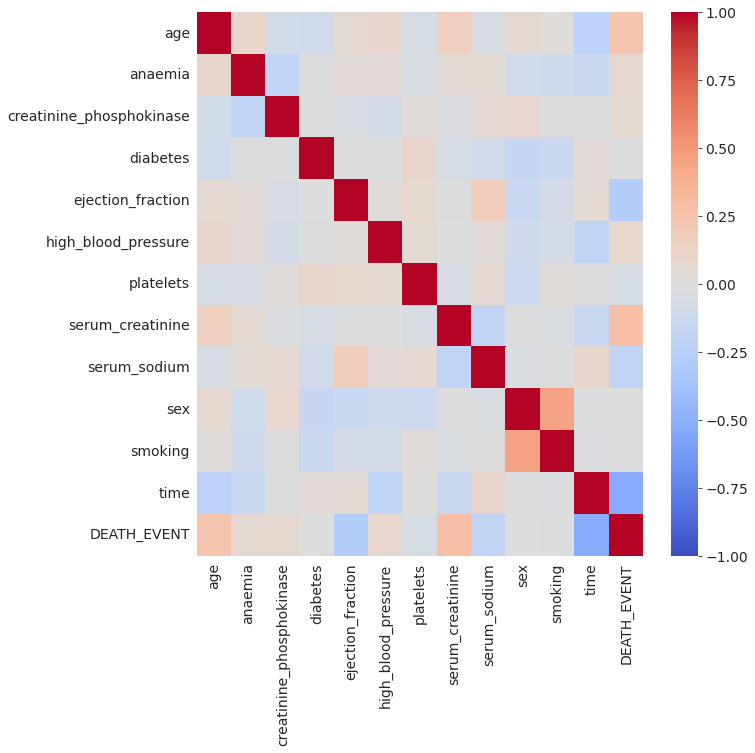

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_df.corr(), vmin=-1, cmap='coolwarm', annot=False);

In [42]:
px.histogram(raw_df, x='age', title='Death depenting on Age', color='DEATH_EVENT')

In [46]:
px.histogram(raw_df, x='creatinine_phosphokinase', title='Death depending on creatinine_phosphokinase', color='DEATH_EVENT')

In [47]:
px.histogram(raw_df, x='diabetes', title='Death depending on diabetes', color='DEATH_EVENT')

In [48]:
px.histogram(raw_df, x='platelets', title='Death depending on platelets', color='DEATH_EVENT')

In [53]:
px.histogram(raw_df, x='serum_creatinine', title='Death depending on serum_creatinine', color='DEATH_EVENT')

In [56]:
px.scatter(raw_df, x='serum_creatinine',y='platelets', title='Death depending on serum_creatinine', color='DEATH_EVENT')

In [49]:
px.histogram(raw_df, x='sex', title='Death depending on sex', color='DEATH_EVENT')

In [59]:

fig = px.box(raw_df, x='sex', y='age', points="all", color='DEATH_EVENT')
fig.update_layout(
    title_text="Gender-wise Age Spread - Male = 1 Female = 0")
fig.show()

In [57]:
px.histogram(raw_df, x='smoking', title='Death depending on Smoking', color='DEATH_EVENT')

# Train and Validation of Dataset

In [69]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [70]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (179, 13)
val_df.shape : (60, 13)
test_df.shape : (60, 13)


In [97]:
# identify input and target columns 
input_cols = list(train_df.columns)[0:-1]
target_col = 'DEATH_EVENT'

In [98]:
print('input:', input_cols)
print('target:', target_col)

input: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
target: DEATH_EVENT


In [99]:
## create copies not to affect the original data/dataframe
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [100]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [101]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [102]:
train_inputs

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
65,60.0,0,68,0,20,0,119000.0,2.90,127,1,1,64
98,60.0,1,156,1,25,1,318000.0,1.20,137,0,0,85
267,56.0,1,135,1,38,0,133000.0,1.70,140,1,0,244
193,73.0,1,231,1,30,0,160000.0,1.18,142,1,1,180
35,69.0,0,582,1,35,0,228000.0,3.50,134,1,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
168,65.0,0,582,1,40,0,270000.0,1.00,138,0,0,140
158,85.0,1,910,0,50,0,235000.0,1.30,134,1,0,121
250,50.0,0,2522,0,30,1,404000.0,0.50,139,0,0,214
201,45.0,0,308,1,60,1,377000.0,1.00,136,1,0,186


In [103]:
train_targets

65     1
98     0
267    0
193    0
35     1
      ..
168    0
158    0
250    0
201    0
28     1
Name: DEATH_EVENT, Length: 179, dtype: int64

In [104]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
train_inputs[numeric_cols].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,60.836128,0.430168,577.703911,0.379888,37.195531,0.357542,259031.588771,1.358436,136.770950,0.642458,0.296089,128.547486
std,11.789422,0.496488,945.572038,0.486720,11.449488,0.480621,93813.337344,0.940952,3.863986,0.480621,0.457811,78.585899
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,121.000000,0.000000,0.000000,4.000000
25%,51.000000,0.000000,114.000000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,65.500000
50%,60.000000,0.000000,258.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000,117.000000
75%,69.000000,1.000000,582.000000,1.000000,40.000000,1.000000,304000.000000,1.400000,140.000000,1.000000,1.000000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,621000.000000,9.000000,145.000000,1.000000,1.000000,285.000000


As there are no categorical values, I don't need to OneHot eoncode. Also there are no missing values here so i don't need to impute. However my features have a wide range of values, so it'd be useful to scale them/normalize them. 

In [105]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [106]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[40.0, 0.0, 23.0, 0.0, 14.0, 0.0, 25100.0, 0.5, 113.0, 0.0, 0.0, 4.0]

In [107]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[95.0, 1.0, 7861.0, 1.0, 80.0, 1.0, 850000.0, 9.4, 148.0, 1.0, 1.0, 285.0]

In [108]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [109]:
train_inputs[numeric_cols].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.378839,0.430168,0.070771,0.379888,0.351447,0.357542,0.283588,0.096453,0.679170,0.642458,0.296089,0.443229
std,0.214353,0.496488,0.120639,0.486720,0.173477,0.480621,0.113727,0.105725,0.110400,0.480621,0.457811,0.279665
min,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.026549,0.000000,0.228571,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.011610,0.000000,0.242424,0.000000,0.224148,0.044944,0.600000,0.000000,0.000000,0.218861
50%,0.363636,0.000000,0.029982,0.000000,0.363636,0.000000,0.281125,0.067416,0.685714,1.000000,0.000000,0.402135
75%,0.527273,1.000000,0.071319,1.000000,0.393939,1.000000,0.338102,0.101124,0.771429,1.000000,1.000000,0.708185
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.722391,0.955056,0.914286,1.000000,1.000000,1.000000


## Save the transformed data to disk
It makes it simpler to retrieve for future analyses

In [110]:
# save data to parquet format to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [111]:
# convert to dataframe and save to parquet format to disk 
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 4.47 ms, sys: 1.89 ms, total: 6.36 ms
Wall time: 6.89 ms


In [112]:
# read in from parquet file 
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 16.7 ms, sys: 2.21 ms, total: 18.9 ms
Wall time: 19.2 ms


In [113]:
# verify that data is loaded correctly
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (179, 12)
train_targets: (179,)
val_inputs: (60, 12)
val_targets: (60,)
test_inputs: (60, 12)
test_targets: (60,)


# Train the model - Logistic Regression

In [114]:
model = LogisticRegression(solver='liblinear')

In [115]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

In [116]:
print(numeric_cols)

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [117]:
print(model.coef_.tolist())

[[1.6089506064741659, 0.07673525685451138, 0.4683415762402409, 0.3382081946400889, -1.7652660675569372, 0.15533958466646294, -0.13387083307633174, 1.8490653507558246, -0.8219163543508903, -0.15184949230119027, 0.08371019410267258, -2.9572740477257877]]


In [118]:
## see the weights next to features as a DF - easier to gauge 
pd.DataFrame(
    {
        'feature': (numeric_cols),
        'weight': model.coef_.tolist()[0]
     }
)

,feature,weight
0,age,1.608951
1,anaemia,0.076735
2,creatinine_phosphokinase,0.468342
3,diabetes,0.338208
4,ejection_fraction,-1.765266
5,high_blood_pressure,0.155340
6,platelets,-0.133871
7,serum_creatinine,1.849065
8,serum_sodium,-0.821916
9,sex,-0.151849


The higher the value (positive or negative) the better predictor. Age, Serum Creatine and Ejection Fraction appear to be strong indicators. 

In [119]:
print(model.intercept_)

[0.678601]


## Making Predictions

In [120]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [121]:
train_preds = model.predict(X_train)
train_preds

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

In [122]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.36333521, 0.63666479],
       [0.44286594, 0.55713406],
       [0.8959957 , 0.1040043 ],
       [0.69817325, 0.30182675],
       [0.26725051, 0.73274949],
       [0.55514491, 0.44485509],
       [0.7949291 , 0.2050709 ],
       [0.76815916, 0.23184084],
       [0.78971082, 0.21028918],
       [0.70793397, 0.29206603],
       [0.77816595, 0.22183405],
       [0.3973854 , 0.6026146 ],
       [0.74519125, 0.25480875],
       [0.74337742, 0.25662258],
       [0.91152013, 0.08847987],
       [0.80270502, 0.19729498],
       [0.4134854 , 0.5865146 ],
       [0.7333379 , 0.2666621 ],
       [0.38034766, 0.61965234],
       [0.86897977, 0.13102023],
       [0.82558654, 0.17441346],
       [0.33833213, 0.66166787],
       [0.81676568, 0.18323432],
       [0.69400308, 0.30599692],
       [0.89256478, 0.10743522],
       [0.4883417 , 0.5116583 ],
       [0.90809949, 0.09190051],
       [0.44953076, 0.55046924],
       [0.19566173, 0.80433827],
       [0.83849469, 0.16150531],
       [0.

In [123]:
model.classes_

array([0, 1])

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [125]:
accuracy_score(train_targets, train_preds)

0.8379888268156425

In [127]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94117647, 0.05882353],
       [0.36666667, 0.63333333]])

In [128]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 83.80%


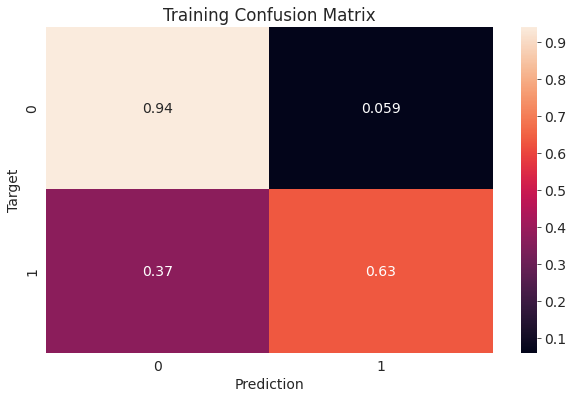

In [129]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 90.00%


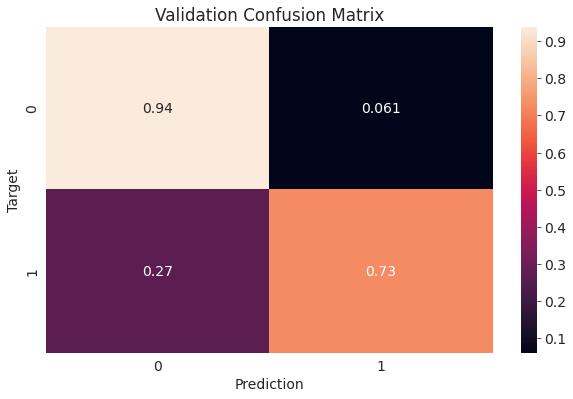

In [130]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 78.33%


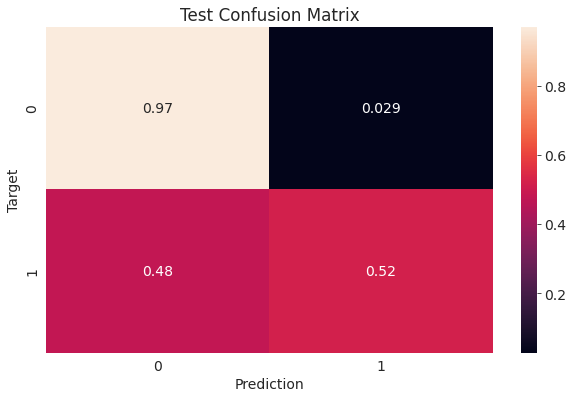

In [131]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 90 and 78.3% respectively, which suggests that our model generalizes well to data it hasn't seen before.

But how good is this accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.


In [132]:
def random_guess(inputs):
    return np.random.choice([0,1], len(inputs))

In [133]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [134]:
accuracy_score(test_targets, random_guess(X_test))

0.38333333333333336

In [135]:
accuracy_score(test_targets, all_no(X_test))

0.5833333333333334

The random model performs with 38.3% accuracy and the all no model with 58.3%. That means that our model performs better than a random or a dumb model. Phew!

In [138]:
raw_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Test on single input prediction

In [139]:
new_input = {
    'age': 50.,
    'anaemia': 0,
    'creatinine_phosphokinase': 196,
    'diabetes': 0,
    'ejection_fraction': 45, 
    'high_blood_pressure': 0, 
    'platelets': 395000.00,
    'serum_creatinine': 1.6, 
    'serum_sodium': 136, 
    'sex': 1,
    'smoking': 1, 
    'time': 285
    }

In [140]:
new_input_df = pd.DataFrame([new_input])

In [142]:
X_new_input = new_input_df[numeric_cols]
X_new_input

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285


In [143]:
prediction = model.predict(X_new_input)[0]

In [144]:
prediction

0

In [145]:
prob = model.predict_proba(X_new_input)[0]
prob

array([1., 0.])

# Save and Load Trained Model

In [148]:
import joblib

In [146]:
heart_fail = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols
}

In [149]:
joblib.dump(heart_fail, 'heart_fail.joblib')

['heart_fail.joblib']

In [150]:
# load
heart_fail2 = joblib.load('heart_fail.joblib')

In [151]:
test_preds2 = heart_fail2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.7833333333333333

As expected, it returns the result from the trained dataset. 